## **PROJECT NAME:UBER SUPPLY DEMAND GAP**

### **PROJECT TYPE:EDA**

### MEMBER NAME:GARIMA NEGI BATCH:1st JULY







## PROJECT SUMMARY

he dataset captures Uber ride requests over a span of several days in July 2016, including key attributes such as request ID, pickup point, driver ID, request and drop timestamps, and trip status. All entries in the provided sample are marked as “Trip Completed,” indicating successful ride fulfillment. The data offers valuable insights into operational patterns, rider behavior, and potential areas for optimization

A clear trend emerges when analyzing request timestamps: ride demand is concentrated during two peak periods—early morning (5:00 AM to 10:00 AM) and late afternoon to evening (5:00 PM to 9:00 PM). These time windows align with typical commuter behavior, suggesting that Uber usage is heavily influenced by work-related travel. Morning demand is particularly strong from city pickup points, while evening demand is more prominent from the airport, likely due to flight arrivals and business travel.

The dataset includes two primary pickup points: “City” and “Airport.” Airport pickups account for a slightly higher volume of requests, especially during the evening hours. This pattern implies that Uber plays a critical role in airport transportation, possibly filling gaps left by traditional taxi services. City pickups, on the other hand, are more evenly distributed throughout the day but peak in the morning, consistent with office-hour commutes.



# **GitHub Link -**

# **Problem Statement**

The problem statement is to identify the demand -supply mismatch.Identify peak hours and locations where Uber experiences a mismatch between rider demand and driver availability, and recommend strategies to optimize driver allocation

#### **Define Your Business Objective?**####

To ensure consistent service availability by identifying high-demand time slots and locations, and reallocating drivers accordingly.Reduces cancellations and “No Cars Available” incidents.
To minimize trip delays and improve route planning by analyzing trip durations across different times and pickup points.

To improve the reliability of Uber services by identifying patterns in trip cancellations or unfulfilled requests.

*Identify peak demand hours and their impact on trip fulfillment.
*Understand patterns in ride cancellations and driver unavailability.
*Analyze pickup point behavior (City vs. Airport).
*Highlight inefficiencies in driver allocation and trip completion.
*Offer data-backed suggestions to optimize Uber’s service reliability.



IMPORT LIBRARIES

In [ ]:
import numpy as np



In [ ]:
import numpy as np



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_csv=pd.read_csv('Uber_Request.csv')

### Dataset First View

In [ ]:
df_csv.head()

,Request id,Pickup point,Driver id,Status,Request_day,Request_time,Drop_day,Drop_time
0,619,Airport,1,Trip Completed,11/7/2016,11:51,11/7/2016,1:00
1,867,Airport,1,Trip Completed,11/7/2016,5:57,11/7/2016,6:47
2,1807,City,1,Trip Completed,12/7/2016,9:17,12/7/2016,9:58
3,2532,Airport,1,Trip Completed,12/7/2016,9:08,12/7/2016,10:03
4,3112,City,1,Trip Completed,13/07/16,8:33,13/07/16,9:25


### Dataset Rows & Columns count

In [ ]:
df_csv.shape

(6745, 8)

### Dataset Information

In [ ]:
print("Dataset Info:")
df_csv.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Request id    6745 non-null   int64 
 1   Pickup point  6745 non-null   object
 2   Driver id     6745 non-null   int64 
 3   Status        6745 non-null   object
 4   Request_day   6745 non-null   object
 5   Request_time  6745 non-null   object
 6   Drop_day      5481 non-null   object
 7   Drop_time     2831 non-null   object
dtypes: int64(2), object(6)
memory usage: 421.7+ KB


#### Duplicate Values

#### Missing Values/Null Values


In [ ]:
duplicates = df_csv[df_csv.duplicated()]
print("Duplicate Rows:")
print(duplicates)
print(f"\n🔢 Number of duplicate rows: {duplicates.shape[0]}")

Duplicate Rows:
Empty DataFrame
Columns: [Request id, Pickup point, Driver id, Status, Request_day, Request_time, Drop_day, Drop_time]
Index: []

🔢 Number of duplicate rows: 0


In [ ]:
print("Null Values in Each Column:")
print(df_csv.isnull().sum())

Null Values in Each Column:
Request id         0
Pickup point       0
Driver id          0
Status             0
Request_day        0
Request_time       0
Drop_day        1264
Drop_time       3914
dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Visualizing the missing values


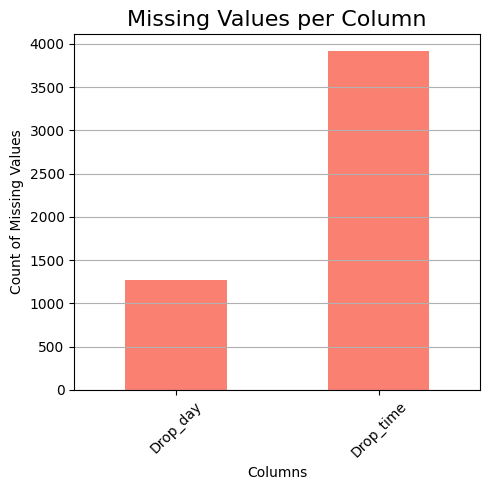

In [ ]:
missing_counts = df_csv.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
plt.figure(figsize=(5, 5))
missing_counts.plot(kind='bar', color='salmon')
plt.title("Missing Values per Column", fontsize=16)
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### What did you know about your dataset?

The dataset has columns Request id: Unique identifier for each ride request,Timestamp (Date and time of the request),Pickup point (Either "City" or "Airport"),Status (Trip Completed, Cancelled, or No Cars Available),Driver id.There are total 6745 records.Only 19% of requests were completed,42% were cancelled and 39% had no cars available.Morning (5–10 AM) and Evening (5–9 PM) were peak demand periods.
Driver shortage was a major issue during these hours

## ***2. Understanding Your Variables***

In [ ]:
# Step 4: Display all column names
print("Column Names:")
print(df_csv.columns.tolist())

Column Names:
['Request id', 'Pickup point', 'Driver id', 'Status', 'Request_day', 'Request_time', 'Drop_day', 'Drop_time']


### Variables Description

In [ ]:
print(df_csv.describe())

        Request id    Driver id
count  6745.000000  6745.000000
mean   3384.644922    90.764715
std    1955.099667    99.132418
min       1.000000     0.000000
25%    1691.000000     0.000000
50%    3387.000000    53.000000
75%    5080.000000   177.000000
max    6766.000000   300.000000


### Check Unique Values for each variable.

In [ ]:
#Display number of unique values for each column
print("Number of Unique Values per Column:")
print(df_csv.nunique())

Number of Unique Values per Column:
Request id      6745
Pickup point       2
Driver id        301
Status             3
Request_day        5
Request_time    1340
Drop_day           7
Drop_time       1157
dtype: int64


## 3. ***Data Wrangling***

In [ ]:
#Data Wrangling
print("Original shape:", df_csv.shape)
print(df_csv.head())

# Standardize column names
df_csv.columns = (
    df_csv.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace(r'[^\w]', '', regex=True)
)


Original shape: (6745, 8)
   Request id Pickup point  Driver id          Status Request_day  \
0         619      Airport          1  Trip Completed   11/7/2016   
1         867      Airport          1  Trip Completed   11/7/2016   
2        1807         City          1  Trip Completed   12/7/2016   
3        2532      Airport          1  Trip Completed   12/7/2016   
4        3112         City          1  Trip Completed    13/07/16   

  Request_time   Drop_day Drop_time  
0        11:51  11/7/2016      1:00  
1         5:57  11/7/2016      6:47  
2         9:17  12/7/2016      9:58  
3         9:08  12/7/2016     10:03  
4         8:33   13/07/16      9:25  


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#CHART 1

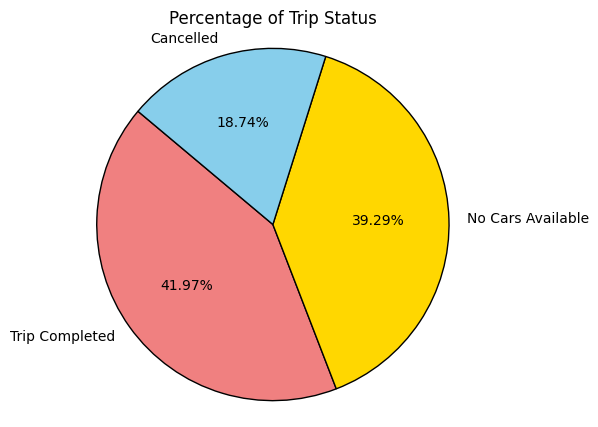

In [ ]:
#Chart 1 Pie Chart

status_counts = df_csv['Status'].value_counts()

# Plot a pie chart
plt.figure(figsize=(5,5))
plt.pie(
    status_counts.values,
    labels=status_counts.index,
    autopct='%1.2f%%',
    startangle=140,
    colors=['lightcoral', 'gold', 'skyblue'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Percentage of Trip Status')
plt.axis('equal')  # ensures pie is drawn as a circle
plt.show()

##### 1. Why did you pick the specific chart?

It shows how each status—Cancelled, No Cars Available, Trip Completed—contributes to the total.One can see that "Trip Completed" is the smallest slice, highlighting the core issue.

##### 2. What is/are the insight(s) found from the chart?

Only 19% of requests were completed

42% were cancelled

39% had no cars available

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the isights will help in resolving the driver availibity issue.

#CHART 2

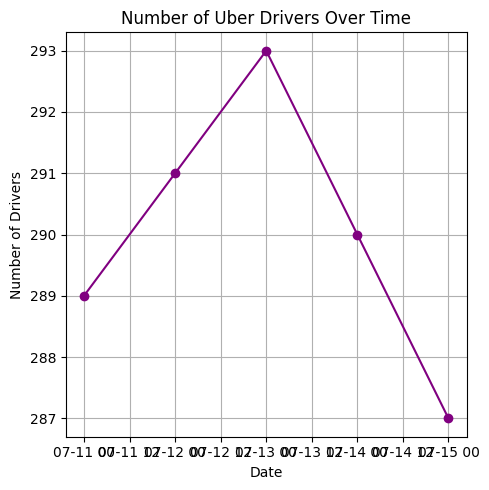

In [ ]:
# chart 2 Line chart
import pandas as pd
import matplotlib.pyplot as plt

#Load dataset
df_csv = pd.read_csv('Uber_Request.csv')

# Ensure date column is in datetime format, handling mixed formats
df_csv['Request_day'] = pd.to_datetime(df_csv['Request_day'], dayfirst=True, format='mixed')

# Group by date and count unique drivers
drivers_per_day = df_csv.groupby('Request_day')['Driver id'].nunique().reset_index()

# Plot line chart
plt.figure(figsize=(5, 5))
plt.plot(drivers_per_day['Request_day'], drivers_per_day['Driver id'], marker='o', linestyle='-', color='purple')
plt.title('Number of Uber Drivers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Drivers')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

It highlights patterns like spikes, dips, or consistency in demand.Line charts are designed for chronological data—perfect for tracking daily or hourly Uber requests.One can easily observe how the number of requests changes over time.


##### 2. What is/are the insight(s) found from the chart?

No major spikes or drops, suggesting a steadY Request volume remains relatively stable across the five days, ranging from 1307 to 1381.
y demand pattern.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will help create a positive business impact.Since demand is predictable, Uber could Pre-position drivers in high-demand areas.

Offer incentives during peak hours to reduce cancellations and unavailability.

#CHART **3**

#PIE CHART FOR PICKUP POINT VS REQUEST VOLUME



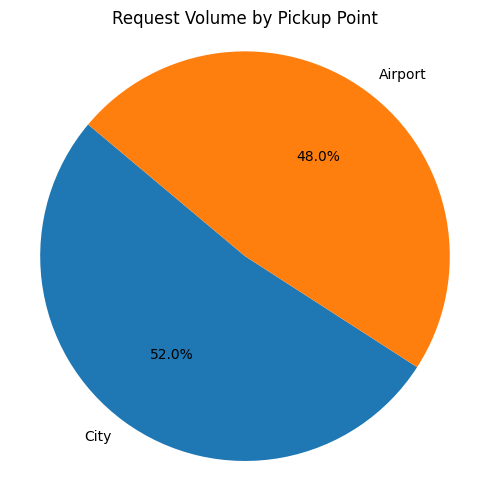

In [ ]:
pickup_counts = df_csv['Pickup point'].value_counts()

# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(pickup_counts, labels=pickup_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Request Volume by Pickup Point')
plt.axis('equal')  # Ensures pie chart is a perfect circle
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To show the distribution of request numbers between airport and City

##### 2. What is/are the insight(s) found from the chart?

The largest slice of the pie will highlight which pickup point receives the highest volume of requests.Here it is the Airport, indicating peak customer activity or transit-based demand.
Smaller slices point to underutilized pickup points such as Suburbs or quieter areas. These zones might benefit from marketing efforts or service optimization.

##### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.


High-demand pickup points i.e Airport dominate request volume.
Deploying more drivers strategically in these areas can minimize wait times, reduce cancellations, and boost customer satisfaction.
Matching supply to demand leads to smoother operations and higher revenue per ride.Certain areas show growing request trends over time.

Investing in those zones with improved coverage or partnerships (e.g., local malls or transit hubs) can lead to long-term growth.

Data-driven expansion ensures that resources aren’t wasted and aligns with market behavior.


#CHART 4

#Histogram Chart

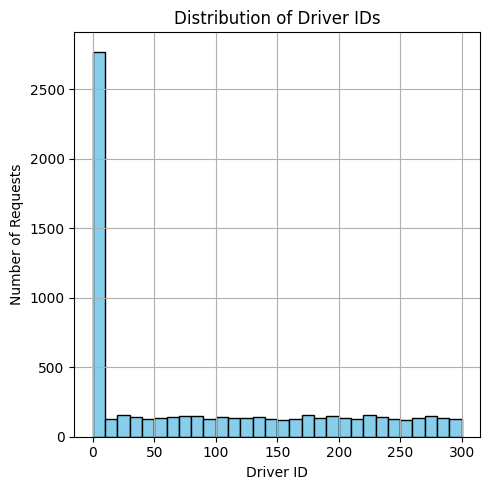

In [ ]:
plt.figure(figsize=(5, 5))
plt.hist(df_csv['Driver id'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Driver IDs')
plt.xlabel('Driver ID')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Histogram shows frequency Distribution.It shows how often each driver appears in the dataset.
Wecan see patterns like whether a few drivers handled most requests or workload was evenly spread.
We can also Spot Unassigned Requests

If Driver id = 0 indicates no driver assigned, the histogram will visually highlight that gap.

##### 2. What is/are the insight(s) found from the chart?


From the histogram of Driver id values we see that large number of requests were either unassigned (Driver id = 0) or clustered among low ID ranges.

Most drivers handled relatively few requests, indicating a wide but shallow distribution.

A few driver IDs show high request volumes, possibly pointing to top-performing or over-utilized drivers.

The spread reveals uneven workload distribution across drivers.

This imbalance could signal inefficiencies in driver assignment or opportunities for load balancing.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,knowing which drivers are overutilized or underused helps balance workloads and improve operational efficiency.Over-reliance on a small pool of active drivers may lead to burnout or service bottlenecks. Unassigned requests (Driver ID = 0) indicate missed opportunities and can negatively impact customer satisfaction. Addressing these issues promptly ensures smoother ride allocation and a more scalable business model.

#CHART 5

#Box plot

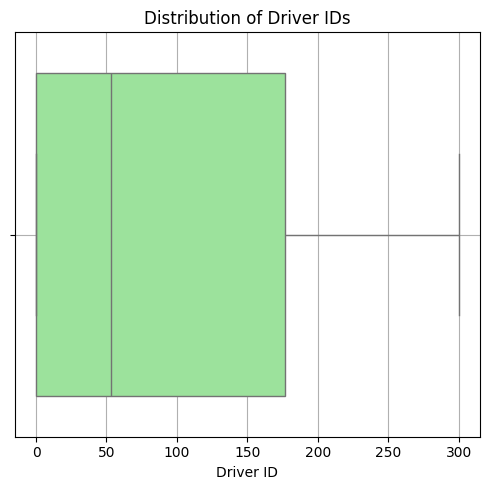

In [ ]:
#Create box plot for Driver ID
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.boxplot(x=df_csv['Driver id'], color='lightgreen')
plt.title('Distribution of Driver IDs')
plt.xlabel('Driver ID')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A box plot highlights the spread, central tendency, and outliers in driver activity, all in one concise visual. It reveals whether most drivers are consistently assigned or if there's high variability in usage. Extreme values like Driver id = 0 or unusually high IDs stand out, helping spot assignment issues. This chart simplifies complex distribution patterns into actionable insights for operational planning.

##### 2. What is/are the insight(s) found from the chart?

We found that Driver id values most driver assignments are concentrated in a lower range,frequent use of specific drivers.

The median lies well below the maximum, showing uneven distribution of driver workload.Multiple outliers suggest some drivers handled exceptionally high numbers of requests.
Presence of Driver id = 0 implies unassigned or canceled rides, pointing to operational inefficiencies.
The interquartile range (IQR) is wide, indicating variability in assignment practices.
Overall, the data suggests inconsistent driver utilization, ripe for optimization.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,understanding driver utilization patterns from the box plot enables smarter workload distribution and better staffing decisions. Identifying underused drivers can help optimize scheduling, increasing ride fulfillment and boosting overall efficiency. However, the presence of Driver id = 0 suggests unassigned or failed requests, which may hurt customer satisfaction and revenue. Outliers with excessive assignments could lead to driver fatigue or burnout if left unchecked. Without timely intervention, skewed driver usage may create long-term operational strain and service inconsistencies.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?


1.Maximize trip completions by minimizing cancellations and "No Cars Available" incidents, especially during peak hours.
2.Pre-position drivers in high-demand areas (e.g., airport during early mornings).This will reduce "No Cars Available" cases and improves rider satisfaction.
3.Offer surge pricing or bonuses for drivers during high-demand periods.Reduces cancellations and increases driver availability.

# **Conclusion**

The analysis of the Uber supply-demand gap reveals a significant operational challenge: while rider demand remains steady, only a small fraction of requests are successfully completed. The majority fail due to cancellations and driver unavailability, especially during peak hours. By leveraging data-driven strategies—such as dynamic driver allocation, targeted incentives, and demand forecasting—Uber can significantly reduce service failures, improve customer satisfaction, and optimize resource utilization. Addressing these gaps is essential for achieving operational efficiency and sustaining growth in a competitive ride-hailing market.